#  CO2 B10 cosz1.0 saw result

### Input Parameter Options

    CO2 Band 10 (4400 - 8200)
    vstar = 4400
    nband = 380
    nv = 10000
    dv = 0.001
    cosz = 1.0
    rsfc = 0.0
    include 'saw75.pro'
    CO2 = 800

    ng = 8
    nref = 2
    p_refs = / 10, 300 /
    t_refs = / 250, 250 /
    ng_refs = / 4, 4 /
    ng_adju = / 0, 0 /
    data wgt / 2*0.85, 2*0.8, 0.75, 2*0.7, 0.85 /
    option_klin = 1
    klin = 2.0e-23
    option_k_lookup = 0
    nl = 0
    nt = 0

### Note
    ~_flux    <- LBL, LBLg (without ktable) for each ig + total + diff.
    ~_heat   <- LBL, LBLg (without ktable) for each ig + total + diff.

### abscom, dg, dgs, ...

In [2]:
df = pd.read_table(path+'fort.19',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                   names=['g','abscom(ig)','abscom(ig)/abscom(ig-1)','dg','dgs','dgs/tflux(1)','accu6th','dgs/rSolsum','pref'])
df

,abscom(ig),abscom(ig)/abscom(ig-1),dg,dgs,dgs/tflux(1),accu6th,dgs/rSolsum,pref
g,,,,,,,,
1,2.364410e-20,0.000000,0.000165,0.029241,0.000128,0.000128,0.000021,10.0
2,4.125820e-21,0.174497,0.000360,0.063888,0.000281,0.000409,0.000047,10.0
3,7.199420e-22,0.174497,0.000991,0.194605,0.000854,0.001263,0.000142,10.0
4,1.256270e-22,0.174497,0.002559,0.480864,0.002111,0.003375,0.000352,10.0
5,5.790020e-22,4.608880,0.002311,0.407993,0.001791,0.005166,0.000299,300.0
6,1.076110e-22,0.185855,0.008927,1.646290,0.007229,0.012395,0.001205,300.0
7,2.000000e-23,0.185855,0.026473,4.916237,0.021586,0.033981,0.003599,300.0
8,1.871480e-31,0.000000,0.958214,220.009882,0.966019,1.000000,0.161050,300.0


### Flux

In [3]:
flx = pd.read_table(path+'new_ng8_all.flx',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                    names=['hPa','LBL_g1','LBLg_g1','LBL_g2','LBLg_g2','LBL_g3','LBLg_g3','LBL_g4','LBLg_g4',
                                          'LBL_g5','LBLg_g5','LBL_g6','LBLg_g6','LBL_g7','LBLg_g7','LBL_g8','LBLg_g8',
                                          'LBL_tot','LBLg_tot','LBLg - LBL'])

pd.concat([flx[flx.index == 0.], flx[flx.index == 1013.]])

,LBL_g1,LBLg_g1,LBL_g2,LBLg_g2,LBL_g3,LBLg_g3,LBL_g4,LBLg_g4,LBL_g5,LBLg_g5,LBL_g6,LBLg_g6,LBL_g7,LBLg_g7,LBL_g8,LBLg_g8,LBL_tot,LBLg_tot,LBLg - LBL
hPa,,,,,,,,,,,,,,,,,,,
0.0,0.02924,0.02924,0.06389,0.06389,0.19461,0.19461,0.48086,0.48086,0.40799,0.40799,1.64629,1.64629,4.91624,4.91624,220.00988,220.00988,227.74900,227.74900,0.00000
1013.0,0.00000,0.00000,0.00000,0.00000,0.00372,0.00000,0.07694,0.00000,0.00001,0.00000,0.06818,0.01939,1.91862,1.85621,217.68908,217.83657,219.75655,219.71217,-0.04438


In [4]:
## save flux data to excel
sav = pd.DataFrame(flx)
sav.to_csv(fname+"flux.csv",header=True,index=True)
fn = fname+'flux.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### Figures

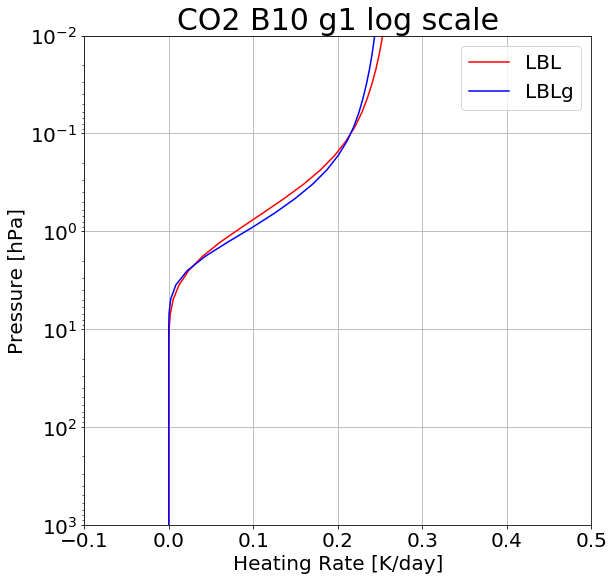

In [5]:
htr = pd.read_table(path+'new_ng8_all.htr',header=None,sep="\s+",keep_default_na=False,
                    names=['hPa','LBL_g1','LBLg_g1','LBL_g2','LBLg_g2','LBL_g3','LBLg_g3','LBL_g4','LBLg_g4',
                                          'LBL_g5','LBLg_g5','LBL_g6','LBLg_g6','LBL_g7','LBLg_g7','LBL_g8','LBLg_g8',
                                          'LBL_tot','LBLg_tot','LBLg - LBL'])

params = {'figure.figsize': (20,9),'legend.fontsize': 20,'axes.labelsize': 20,'axes.titlesize': 30,'xtick.labelsize': 20,'ytick.labelsize': 20}
plt.rcParams.update(params)

max1 = 0.5
max2 = 0.1

# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g1 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g1'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

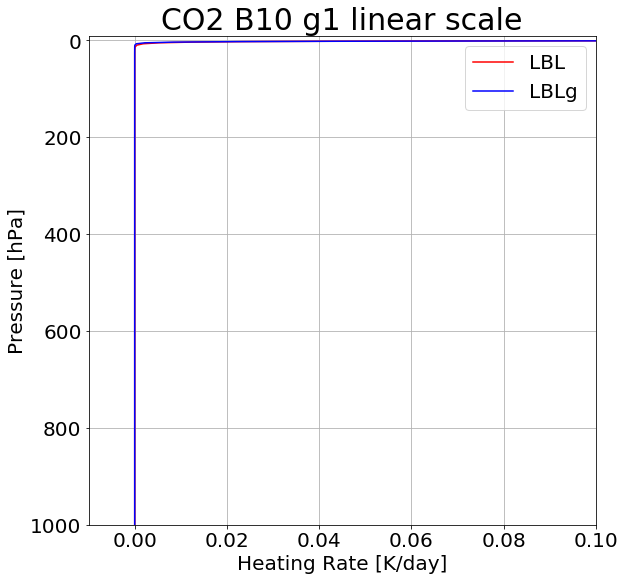

In [6]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g1 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g1'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

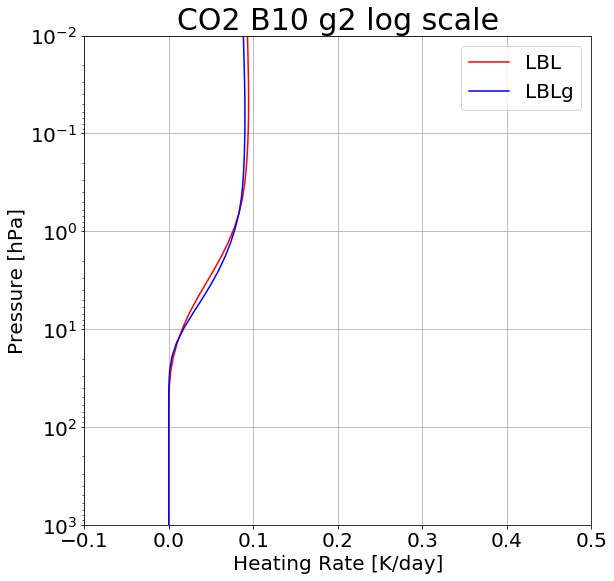

In [7]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g2 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g2'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

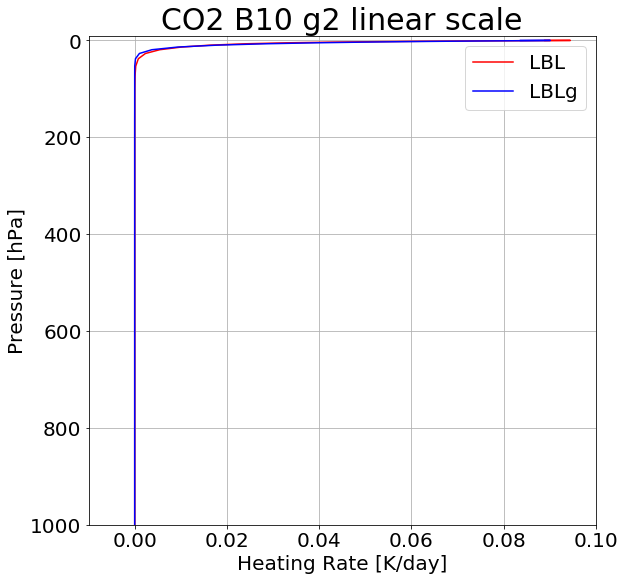

In [8]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g2 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g2'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

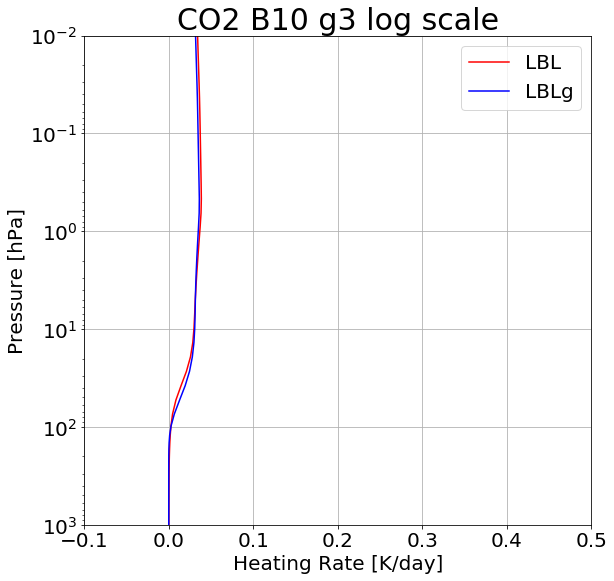

In [9]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g3 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g3'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

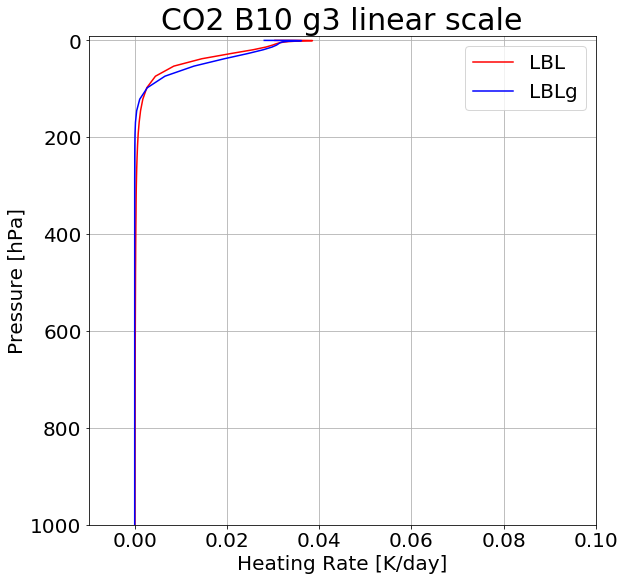

In [10]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g3 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g3'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

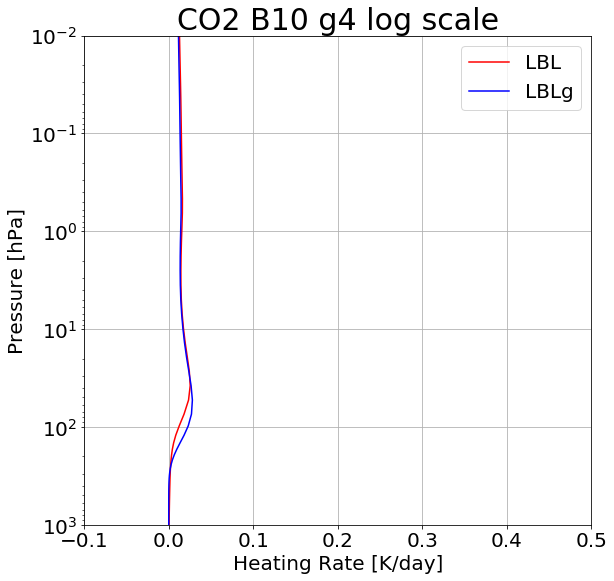

In [11]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g4 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g4'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

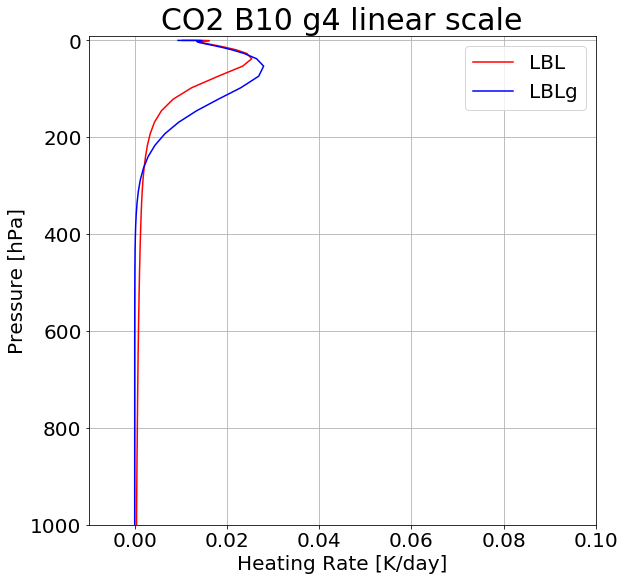

In [12]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g4 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g4'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

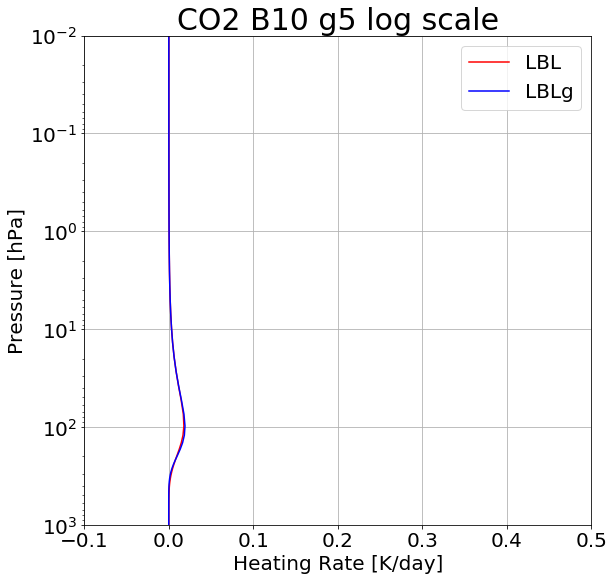

In [13]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g5 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g5'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

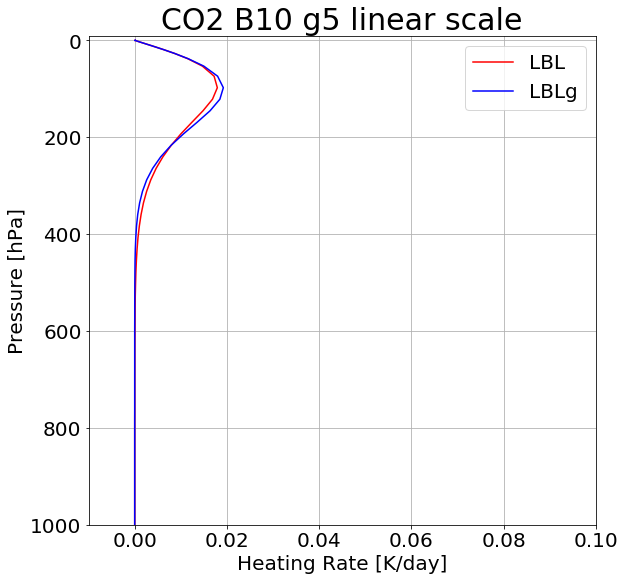

In [14]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g5 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g5'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

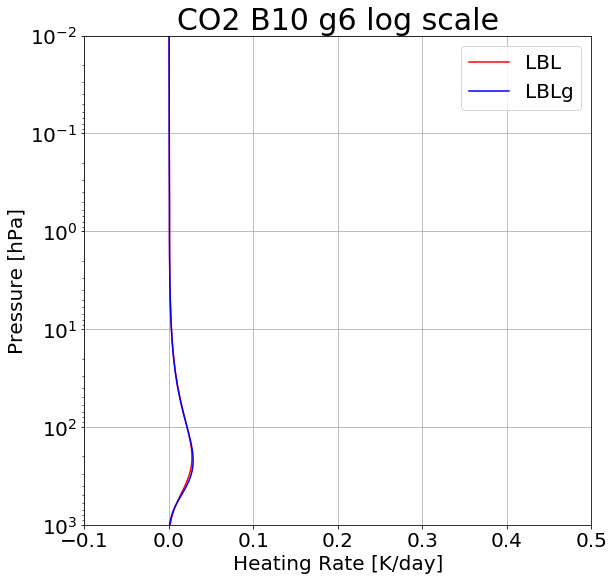

In [15]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g6 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g6'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

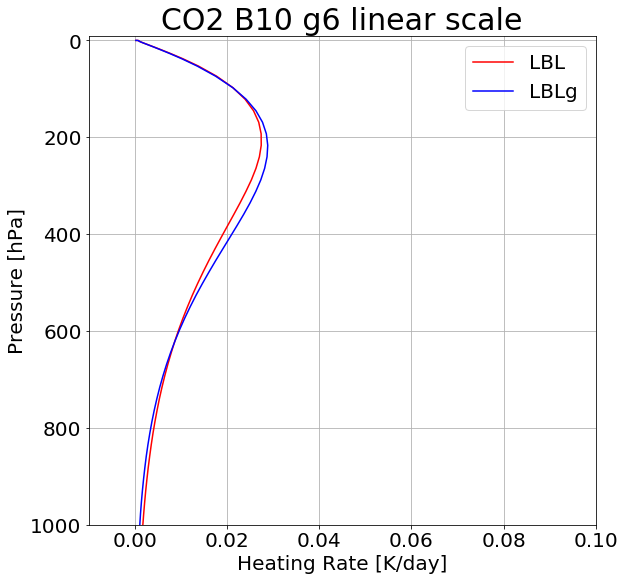

In [16]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g6 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g6'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

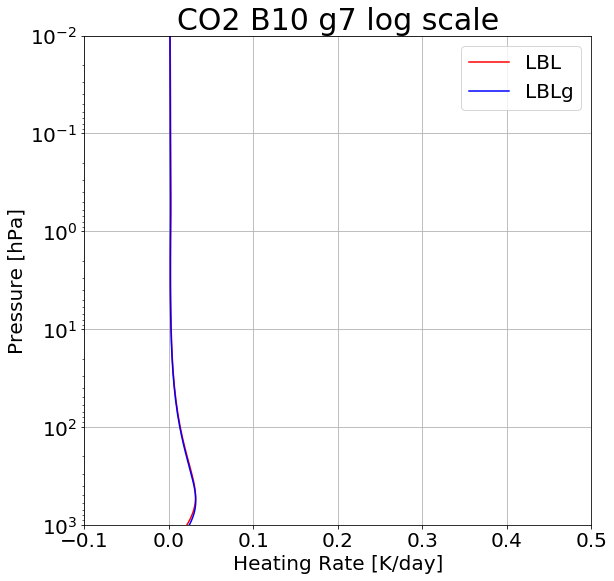

In [17]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g7 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g7'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g7'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

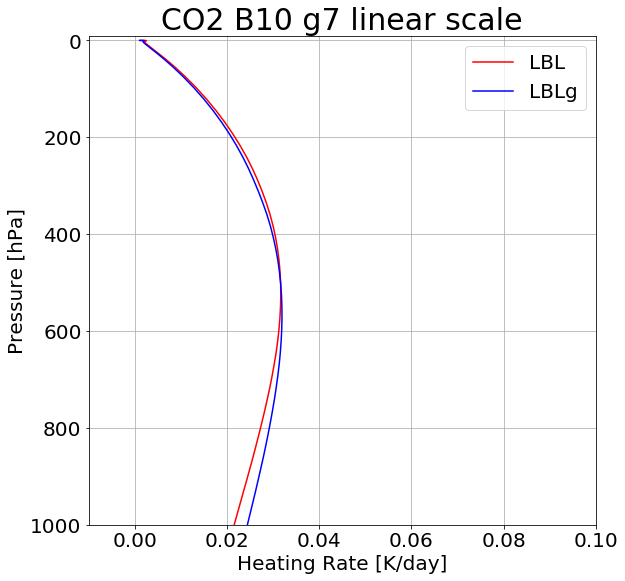

In [18]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g7 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g7'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g7'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

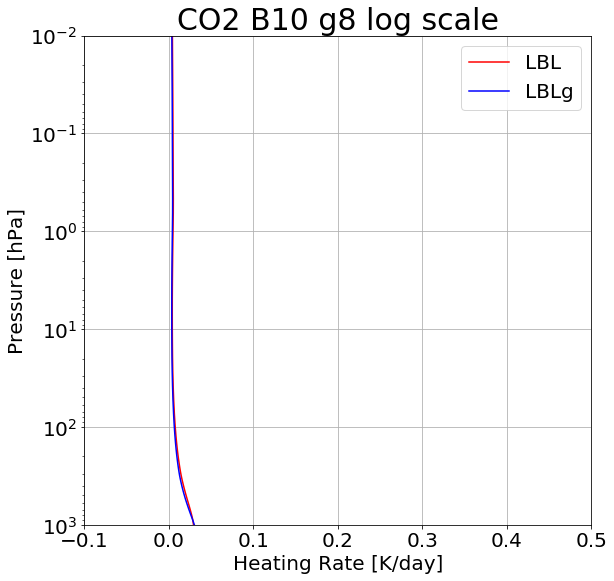

In [19]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 g8 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g8'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g8'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

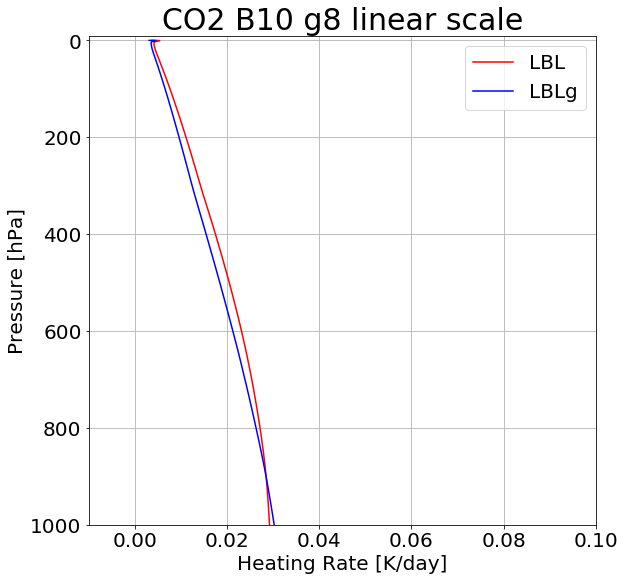

In [20]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 g8 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g8'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g8'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

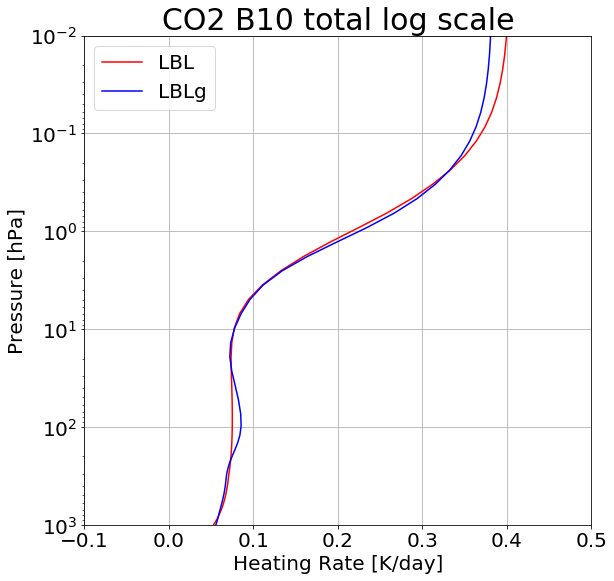

In [21]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,max1,1000,0.01])
plt.grid()
plt.title('CO2 B10 total log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_tot'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

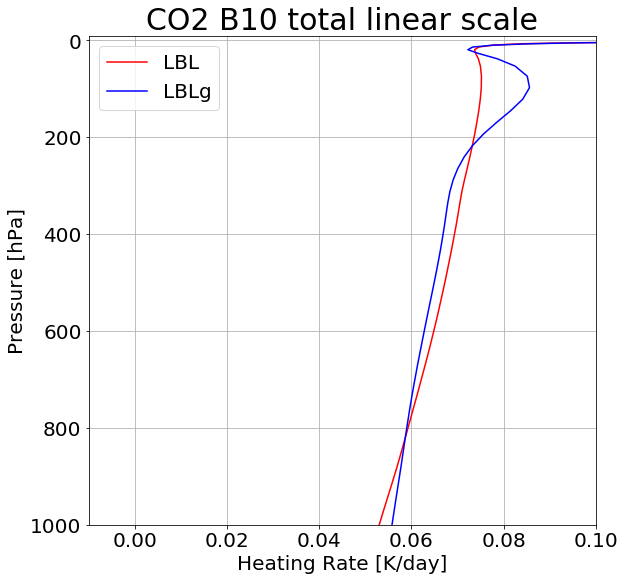

In [22]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,max2,1000,-10])
plt.grid()
plt.title('CO2 B10 total linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_tot'],htr['hPa'],label='LBLg',color='blue')
plt.legend()

plt.show()

In [23]:
## save heating rate to excel for lbl
sav = pd.DataFrame(htr)
sav.to_csv(fname+"heat.csv",header=True,index=False)
fn = fname+'heat.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')